In [6]:
import os
import pandas as pd
from emobpy import DataBase
from emobpy import Mobility, DataBase, Consumption, HeatInsulation, BEVspecs, Availability, Charging
import shutil

In [7]:
home_path = os.getcwd()
os.makedirs(os.path.join(home_path, "db", "used"), exist_ok=True)
consumption_path = os.path.join(home_path, "db", "consumption")
availability_path = os.path.join(home_path, "db", "availability")
profile_path  = os.path.join(home_path, "db", "profile")

DB_profile = DataBase('db/profile')

#os.chdir("../")
data_path = os.getcwd()

In [8]:
number_profiles = 5
year = 2020

In [13]:
def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            #elif entry.is_dir():
             #   total += get_dir_size(entry.path)
    total = total / (10**9)
    return total

def create_new_folder(path, profile_consumption_availability = None, used_dir=False):
    if used_dir == False:
        folder_list = [d for d in os.listdir(path)
                   if os.path.isdir(os.path.join(path, d))]
    
        if len(folder_list) == 0:
            new_f = "0"   
        else:
            new_f = str(max(map(int,folder_list)) + 1)
        new_f_path = os.path.join(path, new_f)
        
    else: 
        new_f_path = os.path.join(home_path, "db", "used", profile_consumption_availability)
    
    os.makedirs(new_f_path, exist_ok=True)

    return new_f_path

def transtion_files(source_dir):
    target_dir = create_new_folder(source_dir)

    file_names = [f for f in os.listdir(source_dir)
                       if os.path.isfile(os.path.join(source_dir, f))]

    for file_name in file_names:
        shutil.move(os.path.join(source_dir, file_name), target_dir)
        
def get_folders(path): 
    f_list = [d for d in os.listdir(path)
              if os.path.isdir(os.path.join(path, d))]
    if ".DS_Store" in f_list:
        f_list.remove(".DS_Store")
    
    return f_list

## Step 1: Vehicle mobility time series

In [24]:
from emobpy import Mobility

def mobility_gen (i):
    m = Mobility(config_folder='config_files')
    m.set_params(
             name_prefix="BEV{}".format(i),
             total_hours=8760, 
             time_step_in_hrs=0.5, # 15 minutes
             category="user_defined",
             reference_date=f"01/01/{year}"
            )
    m.set_stats(
            stat_ntrip_path="TripsPerDay.csv",
            stat_dest_path="DepartureDestinationTrip.csv",
            stat_km_duration_path="DistanceDurationTrip.csv",
            )
    m.set_rules(rule_key="user_defined") 
    # see /config_files/rules.yml, it contains a dictionary, whose key must be the same
    # as rule_key. To see all possible rules `from emobpy.constants import RULE; RULE` 
    m.run()
    m.save_profile(folder="db/profile", description='') # save all info in pickle file in 'db' folder

In [25]:
for i in range(number_profiles):
    
    if get_dir_size(profile_path) < 1:
        mobility_gen(i)
        
    else:
        create_new_folder(profile_path)
        transtion_files(profile_path)
        mobility_gen(i)
    
    DB_profile.update()                # This load new files hosted in database folder as result of new generated files

transtion_files(profile_path)

New profile running: BEV0_W53_0a26b
Progress: 4% [18 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 13% [50 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 15% [56 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 16% [60 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 26% [98 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 28% [103 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 36% [134 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 41% [152 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 42% [156 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 44% [164 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 49% [181 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 63% [230 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 63% [233 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 74% [272 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 75% [274 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 76% [280 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 79% [289 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 83% [303 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 87% [319 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 87% [321 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 88% [324 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 97% [357 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 98% [360 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 99% [362 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV0_W53_0a26b
Elapsed time (min): 0.63
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
New profile running: BEV1_W53_4ffd8
Progress: 1% [7 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 7% [28 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 9% [35 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 18% [67 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 18% [68 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 27% [99 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 38% [139 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 44% [163 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 47% [175 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 53% [194 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 58% [214 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 60% [221 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 75% [275 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 76% [278 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 76% [281 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 78% [288 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 83% [305 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 87% [320 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 92% [338 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 95% [347 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 99% [364 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV1_W53_4ffd8
Elapsed time (min): 0.29
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
New profile running: BEV2_W53_a8099
Progress: 2% [9 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 3% [13 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

    Day 13 'select_tour' method in loop Nr. 100. See log file BEV2_W53_a8099
       last_trip_to home                   0.40 uncompliance rate (last 30 iter)
       equal_state_and_destination home    0.23 uncompliance rate (last 30 iter)


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


  Tour done: Day 13
Progress: 4% [15 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 7% [28 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 8% [30 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 9% [33 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 10% [40 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 20% [76 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 21% [80 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 36% [133 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 37% [137 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 40% [148 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 41% [152 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 44% [162 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 51% [188 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 58% [215 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 60% [220 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 66% [243 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 82% [302 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 87% [321 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 95% [347 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 95% [350 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 98% [361 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 99% [364 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe


Profile done: BEV2_W53_a8099
Elapsed time (min): 0.29
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
New profile running: BEV3_W53_25a4f
Progress: 3% [13 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 3% [14 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 12% [47 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 14% [54 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

    Day 54 'select_tour' method in loop Nr. 100. See log file BEV3_W53_25a4f
       last_trip_to home                  0.50 uncompliance rate (last 30 iter)


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

       overall_min_or_max_time_at home    0.23 uncompliance rate (last 30 iter)
  Tour done: Day 54
Progress: 15% [56 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 17% [65 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 19% [70 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 23% [86 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 24% [90 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 26% [96 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

    Day 96 'select_tour' method in loop Nr. 100. See log file BEV3_W53_25a4f
       last_trip_to home                  0.47 uncompliance rate (last 30 iter)
       overall_min_or_max_time_at home    0.40 uncompliance rate (last 30 iter)


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

  Tour done: Day 96
Progress: 27% [101 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 35% [130 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 36% [134 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 39% [143 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 39% [145 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 40% [149 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 45% [167 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 64% [236 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 77% [284 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 80% [292 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 84% [308 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 87% [321 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 88% [323 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 98% [358 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 98% [360 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV3_W53_25a4f
Elapsed time (min): 0.32
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
New profile running: BEV4_W53_6456c
Progress: 7% [27 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 10% [37 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 13% [51 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 20% [73 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 24% [91 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 31% [115 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 36% [134 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 40% [147 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 43% [158 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 46% [169 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 46% [171 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 48% [177 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 54% [200 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 55% [204 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 58% [213 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 60% [221 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 64% [234 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 68% [250 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 69% [255 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 73% [267 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 73% [268 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 76% [281 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 81% [299 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 91% [333 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 96% [354 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 98% [358 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV4_W53_6456c
Elapsed time (min): 0.28
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


In [26]:
#m.kind
#m.description
#m.timeseries
#m.profile.head()
#from emobpy.plot import NBplot
#fig_mobility = NBplot(DB_profile).sgplot_dp(m.name)
#fig_mobility

------------------------------------------------------
## Step 2: Driving consumption time series
------------------------------------------------------
a) Vehicle model configuration

------------------------------------------------------

In [27]:
from emobpy import Consumption, HeatInsulation, BEVspecs

In [28]:
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

In [29]:
p_list = os.listdir(profile_path)
if ".DS_Store" in p_list:
    p_list.remove(".DS_Store")
elif '.ipynb_checkpoints' in p_list:
    p_list.remove('.ipynb_checkpoints')
    
number_profiles_all = -1

for folder in p_list:
    number_profiles_all += len([d for d in os.listdir(os.path.join(profile_path, folder))
     if os.path.isfile(os.path.join(profile_path, folder, d))])
    
models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles_all*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
        
while i <= number_profiles_all:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1

0
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
1
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.
2
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallbac

In [30]:
#plausibility check
len(models_assigned) - number_profiles_all

1

In [31]:
def consumption_gen(i, file, DB):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=year,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
    )
    c.save_profile(consumption_path)    

In [34]:
for folder in p_list:
    ts_path = os.path.join(profile_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()


    pnames = list(DB.db.keys()) 
    
    for i, file in enumerate(pnames):

        if get_dir_size(consumption_path) < 1.5:
            consumption_gen(i, file, DB)

        else:
            create_new_folder(consumption_path)
            transtion_files(consumption_path)
            consumption_gen(i, file, DB)
        
        mobility_file_path = os.path.join(ts_path, f'{file}.pickle')
        
        used_profile = os.path.join(home_path, "db", "used", "profile")
        if get_dir_size(used_profile) < 1.5:
            pass

        else:
            create_new_folder(used_profile)
            transtion_files(used_profile)
            
        shutil.move(mobility_file_path, 
                    create_new_folder("not_needed", profile_consumption_availability = "profile", used_dir=True)
                   )
    
    DB = DataBase(consumption_path)
    DB.update()             
transtion_files(used_profile)
transtion_files(consumption_path)

Model 3 Long Range AWD
New profile running: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_93fcb
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [655 / 655] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
ID.3
New profile running: BEV4_W53_6456c_Volkswagen_ID.3_2020_7c359
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [671 / 671] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Zoe Q90
New profile running: BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b
temp Kelvin DE 2020 Timezone: Europe/Berlin
pressure Pascal DE 2020 Timezone: Europe/Berlin
dew_point Kelvin DE 2020 Timezone: Europe/Berlin
Progress: 100% [722 / 722] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\m

mname = list(DB_profile.db.keys())     # getting the id of the first mobility profile
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()                    # Database that contains BEV models
#BEVS.show_models()

models = {
    "Tesla": 
        {"model": "Model 3 Long Range AWD",
         "year": 2019,
         "share": 22.73},
    "Volkswagen":
        {"model": "ID.3",
         "year": 2020,
         "share": 15.91},
    "Renault":
        {"model": "Zoe Q90",
         "year": 2017,
         "share": 15.91},
    "Hyundai":
        {"model": "Kona Electric 64 kWh",
         "year": 2019,
         "share": 11.63},
    "FIAT":
        {"model": "500e",
         "year": 2019,
         "share": 9.09},
    "BMW":
        {"model": "i3 33 kWh",
         "year": 2017,
         "share": 6.82},
    "MINI":
        {"model": "Cooper SE Level I",
         "year": 2020,
         "share": 6.82},
    "Audi": 
        {"model": "e-tron 55 quattro",
         "year": 2019,
         "share": 4.55},
    "Hyundai": 
        {"model": "IONIQ Electric 28 kWh",
         "year": 2019,
         "share": 4.55},
    "KIA": 
        {"model": "e-Niro 64 kWh",
         "year": 2019,
         "share": 2.27}
    
}

back_up_model = {
    "brand": "Volkswagen",
    "model": "e-Golf SE",
    "year": 2019
}

models_assigned = {}

i = 0
for brand in models.keys():
    models[brand]["number"] = round(number_profiles*models[brand]["share"]/100)
    #print(brand + " " +str(models[brand]["number"]))
    for k in range(0, round(models[brand]["number"])): 
        print(str(i))
        models_assigned[str(i)] = BEVS.model((
            brand, models[brand]["model"], models[brand]["year"]
        ))
        i += 1
while i <= number_profiles:
    
    models_assigned[str(i)] = BEVS.model((
            back_up_model["brand"], back_up_model["model"], back_up_model["year"]
        ))
    i += 1
    
    #plausibility check
len(models_assigned) - number_profiles

for i, file in enumerate(mname):
    car_model = models_assigned[str(i)]
    print(car_model.parameters['EV Model'])
    c = Consumption(file, car_model)
    c.load_setting_mobility(DB_profile)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=2016,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
    )
    c.save_profile(consumption_path)          

------------------------------
c) See some attributes

------------------------------

In [35]:
#c.name
#c.input
#c.brand, c.model, c.year
#c.timeseries # Consumption in kWh/timestep -> timestep 15 min in this example
#c.profile.head()

-------------------------
d) Visualization

-------------------------

In [36]:
#fig_consumption = PLT.sankey(c.name, include=None, to_html=False, path=None)
#fig_consumption

-------------------------------------------------------------------
## Step 3: Grid availability time series
-------------------------------------------------------------------
a) probability distribution and power rating for charging stations

-------------------------------------------------------------------

In [37]:
from emobpy import Availability

In [38]:
station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
    'prob_charging_point': {
        'errands': {'public': 0.5, 'none': 0.5},
        'escort': {'public': 0.5, 'none': 0.5},
        'leisure': {'public': 0.5, 'none': 0.5},
        'shopping': {'public': 0.5, 'none': 0.5},
        'home': {'public': 0.4, 'home': 0.6},
        'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
        'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
    'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
        'public': 22,
        'home': 3.7,
        'workplace': 11,
        'none': 0,  # dummy station
        'fast75': 75,
        'fast150': 150}
}

In [39]:
c_list = os.listdir(consumption_path)
if ".DS_Store" in c_list:
    c_list.remove(".DS_Store")

In [40]:
def availability_gen(file, DB):
    ga = Availability(file, DB)
    ga.set_scenario(station_distribution)
    ga.run()
    ga.save_profile(availability_path)

In [42]:
for folder in c_list:
    ts_path = os.path.join(consumption_path, folder)
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()
    
    cnames = list(DB.db.keys()) 
    
    for file in cnames:

        if get_dir_size(availability_path) < 1.5:
            availability_gen(file, DB)

        else:
            create_new_folder(availability_path)
            transtion_files(availability_path)
            availability_gen(file, DB)
    
        cons_file_path = os.path.join(ts_path, f'{file}.pickle')
        
        used_consumption = os.path.join(home_path, "db", "used", "consumption")
        if get_dir_size(used_consumption) < 1.5:
            pass

        else:
            create_new_folder(used_consumption)
            transtion_files(used_consumption)
            
        shutil.move(cons_file_path, 
                        create_new_folder("not_needed", profile_consumption_availability = "consumption", used_dir=True)
                       )
    DB = DataBase(availability_path)
    DB.update()             
transtion_files(used_consumption)
transtion_files(availability_path)

soc_init:0.5 --> soc_end:1.0
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_694ee_avai_441ef
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai_6e8ac
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV4_W53_6456c_Volkswagen_ID.3_2020_7c359_avai_ed65f
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_289f3_avai_54939
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_93fcb_avai_cbad4
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done

--------------------------------
b) See some attributes

--------------------------------

In [43]:
#ga.name
#ga.input
#ga.battery_capacity
#ga.charging_eff
#ga.discharging_eff
#ga.soc_init
#ga.soc_min
#ga.timeseries

# Export

In [44]:
c_list = os.listdir(used_consumption)
if ".DS_Store" in c_list:
    c_list.remove(".DS_Store")
    
consumption_df = pd.DataFrame() 

for folder in c_list:
    DB = DataBase(os.path.join(used_consumption, folder))
    DB.update()
    DB.loadfiles()
    c_names = list(DB.db.keys()) 
    print(len(c_names))
    
    #get consumption_ts, name
    for c_file in c_names:
        profile = DB.db[c_file]
        try:
            col_name = profile["brand"]+"/" +profile["model"]+"/" +profile["year"]
            consumption = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":col_name})
            consumption_df = pd.concat([consumption_df, consumption], axis=1)
            print(col_name)
        except KeyError:
            print(c_file)
            pass

7
Tesla/Model_3_Long_Range_AWD/2019
Renault/Zoe_Q90/2017
Volkswagen/ID.3/2020
Tesla/Model_3_Long_Range_AWD/2019
Tesla/Model_3_Long_Range_AWD/2019
Volkswagen/e-Golf_SE/2019
Volkswagen/e-Golf_SE/2019


In [54]:
ava_list

[]

In [55]:
availability_df = pd.DataFrame()
car_properties_df = pd.DataFrame(index = ["soc_end", "soc_init", "battery_capacity"])

ava_list = os.listdir(availability_path)
if ".DS_Store" in ava_list:
    ava_list.remove(".DS_Store")

for folder in ava_list:
    DB = DataBase(os.path.join(availability_path, folder))
    DB.update()
    DB.loadfiles()
    ava_names = list(DB.db.keys()) 
    print(len(ava_names))

    #charging cap [kW] 
    for a_file in ava_names:
        profile = DB.db[a_file]
        try:
            col_name = "_".join(profile["name"].split("_")[:-3])

            charging_eff = profile["charging_eff"]
            availability = (charging_eff*profile["timeseries"]["charging_cap"]
                           ).to_frame().rename(
                columns={"charging_cap":col_name})
            availability_df = pd.concat([availability_df, availability], axis=1)

            car_properties_df[col_name] = [
                profile["soc_end"], profile["soc_init"], profile["battery_capacity"]
                              ]   
        except KeyError:
            print(a_file)
            pass

7


<AxesSubplot:xlabel='date'>

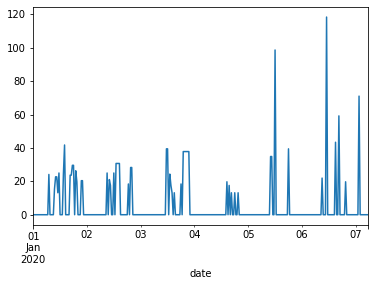

In [46]:
consumption_df = consumption_df*1000/4
consumption_df.sum(1).iloc[:300].plot()

<AxesSubplot:xlabel='date'>

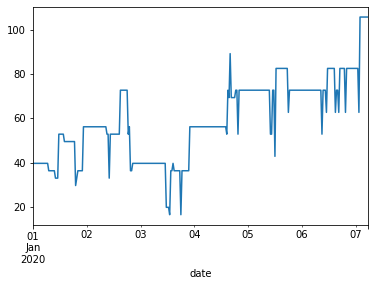

In [56]:
availability_df.sum(1).iloc[:300].plot()

In [8]:
data_path

'C:\\Users\\j.muessel\\Documents\\GitHub\\EES\\Emobpy\\my_emobpy'

In [60]:
consumption_pickle = os.path.join(data_path, "consumption")
availaibilty_pickle = os.path.join(data_path, "availability")
property_pickle = os.path.join(data_path, "properties")

#consumption_df.to_pickle(consumption_pickle)
#availability_df.to_pickle(availaibilty_pickle)
#car_properties_df.to_pickle(property_pickle)


# N-sufficient

In [61]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [62]:
consumption = pd.read_pickle(consumption_pickle )

In [63]:
reduced = consumption.dropna()
n_max = reduced.shape[1]

In [64]:
rmse = {}

for sample_size in range(10, n_max): 
    Y_true = reduced.mean(1)
    Y_pred = reduced.iloc[:,:sample_size].mean(1)
    rmse[f'{sample_size}'] = mean_squared_error(Y_true,Y_pred, squared=False) 

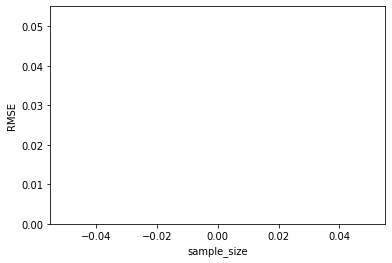

In [65]:
plt.scatter(range(10, n_max), rmse.values())
plt.xlabel("sample_size")
plt.ylabel("RMSE")
plt.ylim(0)
plt.show()

# Plot

In [16]:
#short_profiles = os.path.join(os.getcwd(), "db", "all_in_short")
used_consumption = os.path.join(os.getcwd(), "db", "used", "consumption")
availability_path = os.path.join(os.getcwd(), "db", "availability")

In [17]:
os.makedirs(os.path.join(data_path, "ged"), exist_ok=True)
ged_path = os.path.join(data_path, "ged")

In [18]:
folder_cons = get_folders(used_consumption)
folder_ava = get_folders(availability_path)

In [19]:
strategy = "immediate"
count=0

for folder_nr in folder_ava:
    ts_path = os.path.join(availability_path, str(folder_nr))
    DB = DataBase(ts_path)
    DB.update()
    DB.loadfiles()
    for a_name in os.listdir(ts_path):
        if "DS_Store" not in a_name.split(".pickle")[0]:
            a_name = a_name.split(".pickle")[0]
            print(a_name)
            ged = Charging(a_name)
            ged.load_scenario(DB)
            ged.set_sub_scenario(strategy)
            ged.run()
            ged.save_profile(ged_path)

BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_289f3_avai_54939
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_289f3_avai_54939_immediate_95d39
BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_694ee_avai_441ef
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_694ee_avai_441ef_immediate_4e821
BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_93fcb_avai_cbad4
Profile done: BEV0_W53_0a26b_Tesla_Model_3_Long_Range_AWD_2019_93fcb_avai_cbad4_immediate_9253f
BEV1_W53_4ffd8_Volkswagen_e-Golf_SE_2019_96a4b_avai_157a4
Profile done: BEV1_W53_4ffd8_Volkswagen_e-Golf_SE_2019_96a4b_avai_157a4_immediate_482ef
BEV2_W53_a8099_Volkswagen_e-Golf_SE_2019_63666_avai_31641
Profile done: BEV2_W53_a8099_Volkswagen_e-Golf_SE_2019_63666_avai_31641_immediate_4b800
BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai_6e8ac
Balance: -0.01. Consumption: 92.6. charge_battery: 115.4. sto_init: 22.8. sto_end: 45.61
Profile done: BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai_6e8ac_immediate_3b0

In [20]:
GDB = DataBase(ged_path)
GDB.loadfiles()

data = []
for grid_demand in GDB.db:
    df = GDB.db[grid_demand]['timeseries']
    df['id'] = grid_demand
    data.append(df[['id','hh','state','charging_point','charge_grid']]) # must include 'id','hh','state' remaining are optional and depend on the time series type

df = pd.concat(data)
df.iloc[:,0].unique().size

14

In [22]:
 GDB.db[grid_demand]['timeseries']

hh state distance consumption charging_point  \
date                                                                    
2020-01-01 00:00:00     0.0  home      0.0         0.0           home   
2020-01-01 00:30:00     0.5  home      0.0         0.0           home   
2020-01-01 01:00:00     1.0  home      0.0         0.0           home   
2020-01-01 01:30:00     1.5  home      0.0         0.0           home   
2020-01-01 02:00:00     2.0  home      0.0         0.0           home   
...                     ...   ...      ...         ...            ...   
2020-12-30 21:30:00  8757.5  home      0.0         0.0           home   
2020-12-30 22:00:00  8758.0  home      0.0         0.0           home   
2020-12-30 22:30:00  8758.5  home      0.0         0.0           home   
2020-12-30 23:00:00  8759.0  home      0.0         0.0           home   
2020-12-30 23:30:00  8759.5  home      0.0         0.0           home   

                    charging_cap actual_soc charge_battery charge_grid  \
date                                                                     
2020-01-01 00:00:00          3.7   0.536505           3.33         3.7   
2020-01-01 00:30:00          3.7    0.57301           3.33         3.7   
2020-01-01 01:00:00          3.7   0.609515           3.33         3.7   
2020-01-01 01:30:00          3.7   0.646021           3.33         3.7   
2020-01-01 02:00:00          3.7   0.682526           3.33         3.7   
...                          ...        ...            ...         ...   
2020-12-30 21:30:00          3.7        1.0            0.0         0.0   
2020-12-30 22:00:00          3.7        1.0            0.0         0.0   
2020-12-30 22:30:00          3.7        1.0            0.0         0.0   
2020-12-30 23:00:00          3.7        1.0            0.0         0.0   
2020-12-30 23:30:00          3.7        1.0            0.0         0.0   

                                                                    id  
date                                                                    
2020-01-01 00:00:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-01-01 00:30:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-01-01 01:00:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-01-01 01:30:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-01-01 02:00:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
...                                                                ...  
2020-12-30 21:30:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-12-30 22:00:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-12-30 22:30:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-12-30 23:00:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  
2020-12-30 23:30:00  BEV3_W53_25a4f_Renault_Zoe_Q90_2017_4180b_avai...  

[17520 rows x 10 columns]

In [70]:
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [71]:
#ged_import = "/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Git_hub/EES/Emobpy/save/demand.csv"
#df = pd.read_csv(ged_import, index_col = 0)
df.index = pd.DatetimeIndex(df.index)

In [72]:
df_new = df.loc[df.index.date<pd.Timestamp(2020,1,8).date()]

In [73]:
def start_and_end_week(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt["date"] = pd.to_datetime(dt["date"])
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    #dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df

In [74]:
def data_curation(df, column_values='charge_grid'):
    ''' 
    Convert data frame with all profiles to days of the week and hours of the day
    id represents every profile
    step1 sum up all profiles
    step2 makes the average
    '''
    profiles_n = len(set(df['id'].values))
    step1 = df.groupby([df.index.day_name(),df.index.hour,df.index.isocalendar().week])[column_values].sum()
    step2 = step1/profiles_n
    step3 = pd.DataFrame(step2)
    step4 = step3.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    return step4.unstack().T 

def start_and_end_week_full(df, column_values='charge_grid'):
    '''Remove first and last week as days are missing causing inconsistent average'''
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt.set_index('date')
    dt = data_curation(dt,column_values=column_values).T
    sr = dt['charge_grid']
    start = len(sr[sr.columns[0]].dropna())
    ends = len(sr[sr.columns[-1]].dropna())
    dt = df.reset_index()
    dt['half'] = dt['date'] - min(dt['date'])
    dt = dt[(dt['half'] <= pd.to_timedelta(start,'H')) & (dt['half'] >= pd.to_timedelta(dt['hh'].max() - ends,'H'))].copy()
    df = dt.set_index('date')
    return df

def shares_plot(df, column_values='state', order=['driving','workplace','errands','escort','shopping','leisure','home']):
    '''
    Plot of category shares either locations ('states') or charging point names ('charging_point')
    '''
    sr_count = df.groupby([df.index.day_name(),df.index.hour,column_values])[column_values].count()
    df_count = pd.DataFrame(sr_count).rename(columns={column_values:'count'}).unstack(level=-1).fillna(0)
    df_count.columns = df_count.columns.droplevel()
    present = [exists for exists in order if exists in df_count.columns]
    df_count_sorted = df_count[present[::-1]].reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],level=0)
    df_new_index = (df_count_sorted.T/df_count_sorted.T.sum(axis=0)).T
    df_new_index.loc[:,'new_index'] = [d[:3] for d,h in df_new_index.index.values]
    #[[str(h) if h > 9 else '0'+str(h)][0] ]+ ',' + d[:3] for d,h in df_new_index.index.values]
    df_new_index.set_index('new_index',inplace=True)
    df_new_index.index.name = 'January'
    return df_new_index
    fig = df_new_index#.iplot(kind='area', fill=True,asFigure=True)
    fig['layout'] = {}
    return fig

def box_plot(df, name, column_values='charge_grid', factor=1, color='#14868c',legendname_position=2):
  '''
  Box plot of distance, consumption, or charge_grid. 
  column_values must exist in the df
  '''
  dt = data_curation(df,column_values=column_values)
  data = []
  # Every boxplot has given name. The legend takes the name, legendgroup allows all boxplot with the same identifier have the same color
  flag = legendname_position  # as we the first boxplot is used as xaxis tick we move the name to the next position
  flagcompare = 0
  for key, v in dt.iteritems():
      flagcompare += 1
      data.append({'boxpoints': False, # 'suspectedoutliers' or False
                        'line': {'width': 1.2},
                      'marker': {'color': color},
                        'name': f'''{str(key[1]).zfill(2)},{key[0][0:3]}''' if flag != flagcompare else name,
                  'orientation': 'v',
                        'type': 'box',
                            'y': v.values*factor,
                        'xaxis': 'x',
                      'jitter': 0.0,
                'whiskerwidth': 1.0,
                      'notched': False,
                  'notchwidth': 0.2,
                  'showlegend': False if flag != flagcompare else True,
                  'legendgroup': name
                  })
  return go.Figure(data)

In [75]:
dt = start_and_end_week(df_new)
#figa = shares_plot(dt) 
#shares_plot(dt, column_values='charging_point', order=['none', 'public', 'fast150', 'fast75'])
#figb = box_plot(dt, 'Average vehicle [kWh]', column_values='charge_grid', factor=1, color='#14868c',legendname_position=2)
#fig = cf.subplots([shares_plot(dt),figb],shape=(2,1),shared_xaxes=False)

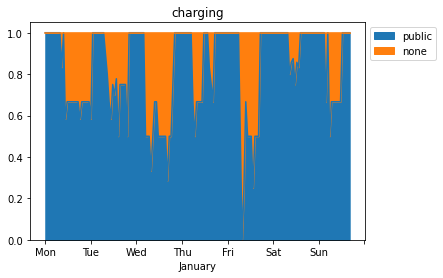

In [76]:
df_charge = shares_plot(dt, column_values='charging_point', order=['none', 'public', 'fast150', 'fast75'])
ax = df_charge.plot.area(title="charging")
ax.legend(bbox_to_anchor=(1,1))

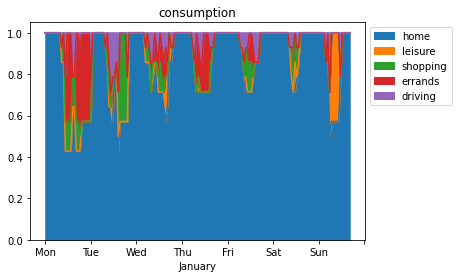

In [77]:
df_ = shares_plot(dt) # with state as default
ax = df_.plot.area(title="consumption")
ax.legend(bbox_to_anchor=(1,1))

In [79]:
# Final customization

fig['layout']['xaxis'].update({'showticklabels':True})
xaxisdct = {'automargin': False,
              'showgrid': False,
              'showline': True,
#               'zeroline':True,
              'tickmode':'array',
              'tickvals': ['00,Mon', '06,Mon', '12,Mon', '18,Mon',
                           '00,Tue', '06,Tue', '12,Tue', '18,Tue',
                           '00,Wed', '06,Wed', '12,Wed', '18,Wed',
                           '00,Thu', '06,Thu', '12,Thu', '18,Thu',
                           '00,Fri', '06,Fri', '12,Fri', '18,Fri',
                           '00,Sat', '06,Sat', '12,Sat', '18,Sat',
                           '00,Sun', '06,Sun', '12,Sun', '18,Sun','23,Sun'],
              'ticktext': ['00:00<br>', '06:00<br>', '12:00<br>Monday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Tuesday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Wednesday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Thursday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Friday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Saturday', '18:00<br>',
                           '00:00<br>', '06:00<br>', '12:00<br>Sunday', '18:00<br>','23:00<br>'],
               'ticklen': 2,
             'tickwidth': 2,
              'tickfont':{'family': 'Arial, sans-serif',
                            'size': 7,
                           'color': 'black'},
             'linewidth': 2,
#          'zerolinecolor': '#969696',
#          'zerolinewidth': 2,
        'showticklabels':True,
                "ticks":"outside",
                'ticklen': 2,
                'tickwidth': 2,
            'linecolor': 'black',
           }
fig['layout']['xaxis'].update(xaxisdct)
fig['layout']['xaxis'].update({'showticklabels':True})


iplot(fig,show_link=False)

NameError: name 'fig' is not defined

In [80]:
fig['layout']['xaxis'].update(xaxisdct)

fig['layout']['yaxis'].update({'title': 'Share',
                           'titlefont': {'size':12},
                            'showgrid': False,'showline':True,'rangemode':"tozero", 'zeroline' : True,
                              'domain': [0.6, 1.0],'tickformat' : ',.0%',
                            'tickfont': {'family': 'Arial, sans-serif',
                                           'size': 12,
                                          'color': 'black'},
                           'linewidth':2,
                            "ticks":"outside",
                            'ticklen': 2,
                            'tickwidth': 2,
                               'linecolor': 'black',
                              })
fig['layout']['yaxis'].update({'title': 'Grid electricity demand (kWh)',
                            'titlefont': {'size':12},
                             'showgrid': True,'showline':True,'rangemode':"tozero",
                               'domain': [0.0, 0.5],
                             'tickfont': {'family': 'Arial, sans-serif',
                                            'size': 12,
                                           'color': 'black'},
                            'linewidth':2,
                                'range': [0,35],
                                'dtick': 5,
                            "ticks":"outside",
                            'ticklen': 2,
                            'tickwidth': 2,
                            'linecolor': 'black',
                               })

fig['layout'].update({'paper_bgcolor': 'white',
                       'plot_bgcolor': 'white',
                             'margin': dict(l=70, r=15, t=20, b=50, pad=0),
                              'width': 1000,
                             'height': 700,
                         'showlegend': True,
                             'legend': {'orientation': 'h','x': 0.15, 'y': 1.04,
                                        'font': dict(family= 'Arial, sans-serif',
                                                       size= 12,
                                                      color= 'black')}
                     })

NameError: name 'fig' is not defined

In [81]:
from emobpy.plot import NBplot

DB = DataBase(os.path.join(used_profile, "0"))
DB.update()
DB.loadfiles()
PLT = NBplot(DB)

m = DB.db[
    list(DB.db.keys())[0]
]

In [82]:
fig_availability = PLT.sgplot_ga(ga["name"], rng=None, to_html=False, path=None)
fig_availability

NameError: name 'ga' is not defined

In [83]:
fig_consumption = PLT.sankey(c["name"], include=None, to_html=False, path=None)
fig_consumption

NameError: name 'c' is not defined

In [84]:
fig_mobility = NBplot(DB).sgplot_dp(m["name"])
fig_mobility